# Computing scVELO E18 Hb cells

___Author___ Lieke L van de Haar

scVelo reference: Bergen, V., Lange, M., Peidli, S. et al. Generalizing RNA velocity to transient cell states through dynamical modeling. Nat Biotechnol 38, 1408–1414 (2020). https://doi.org/10.1038/s41587-020-0591-3
additional info: https://scvelo.readthedocs.io/ 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions() #scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0 louvain==0.6.1


/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0 louvain==0.6.1


In [ ]:
## Load data

In [ ]:
adata = sc.read('./data/output/April2020_E18Hb-WT_quality_filtered_filtered.h5ad')

## Compute velocity and velocity graph
The gene-specific velocities are obtained by fitting a ratio between precursor (unspliced) and mature (spliced) mRNA abundances that well explains the steady states (constant transcriptional state) and then computing how the observed abundances deviate from what is expected in steady state. (We will soon release a version that does not rely on the steady state assumption anymore).

Every tool has its plotting counterpart. The results from `scv.tl.velocity`, for instance, can be visualized using `scv.pl.velocity`.

In [ ]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

In [7]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Plot results

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


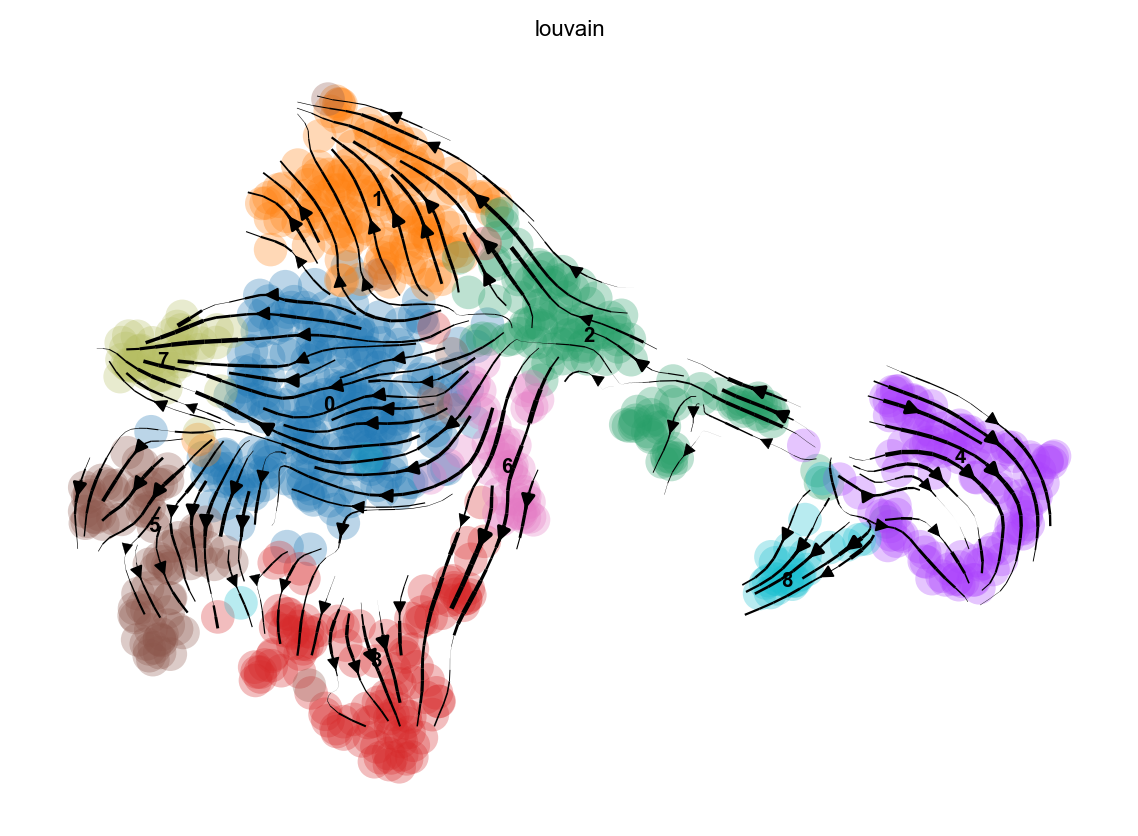

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)


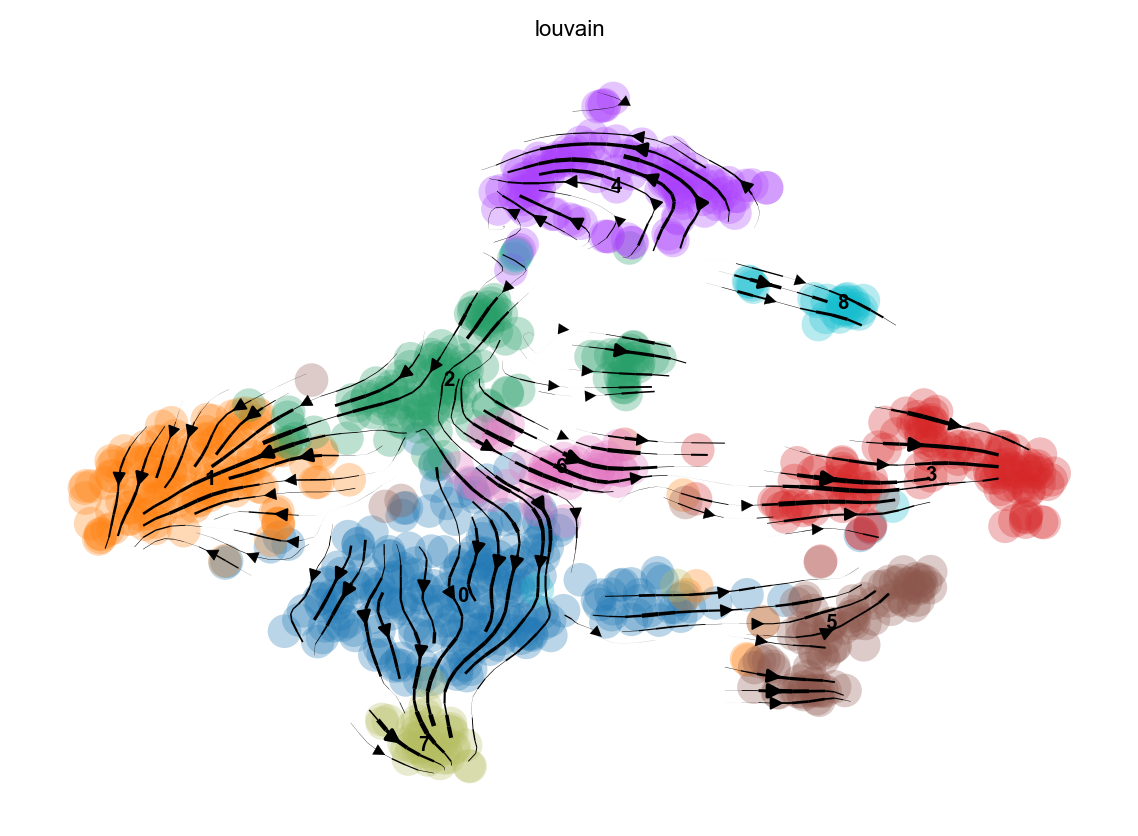

In [11]:
scv.settings.set_figure_params('scvelo')
scv.pl.velocity_embedding_stream(adata, basis='umap')

saving figure to file ./figures/scvelo__scVELO_umap.pdf


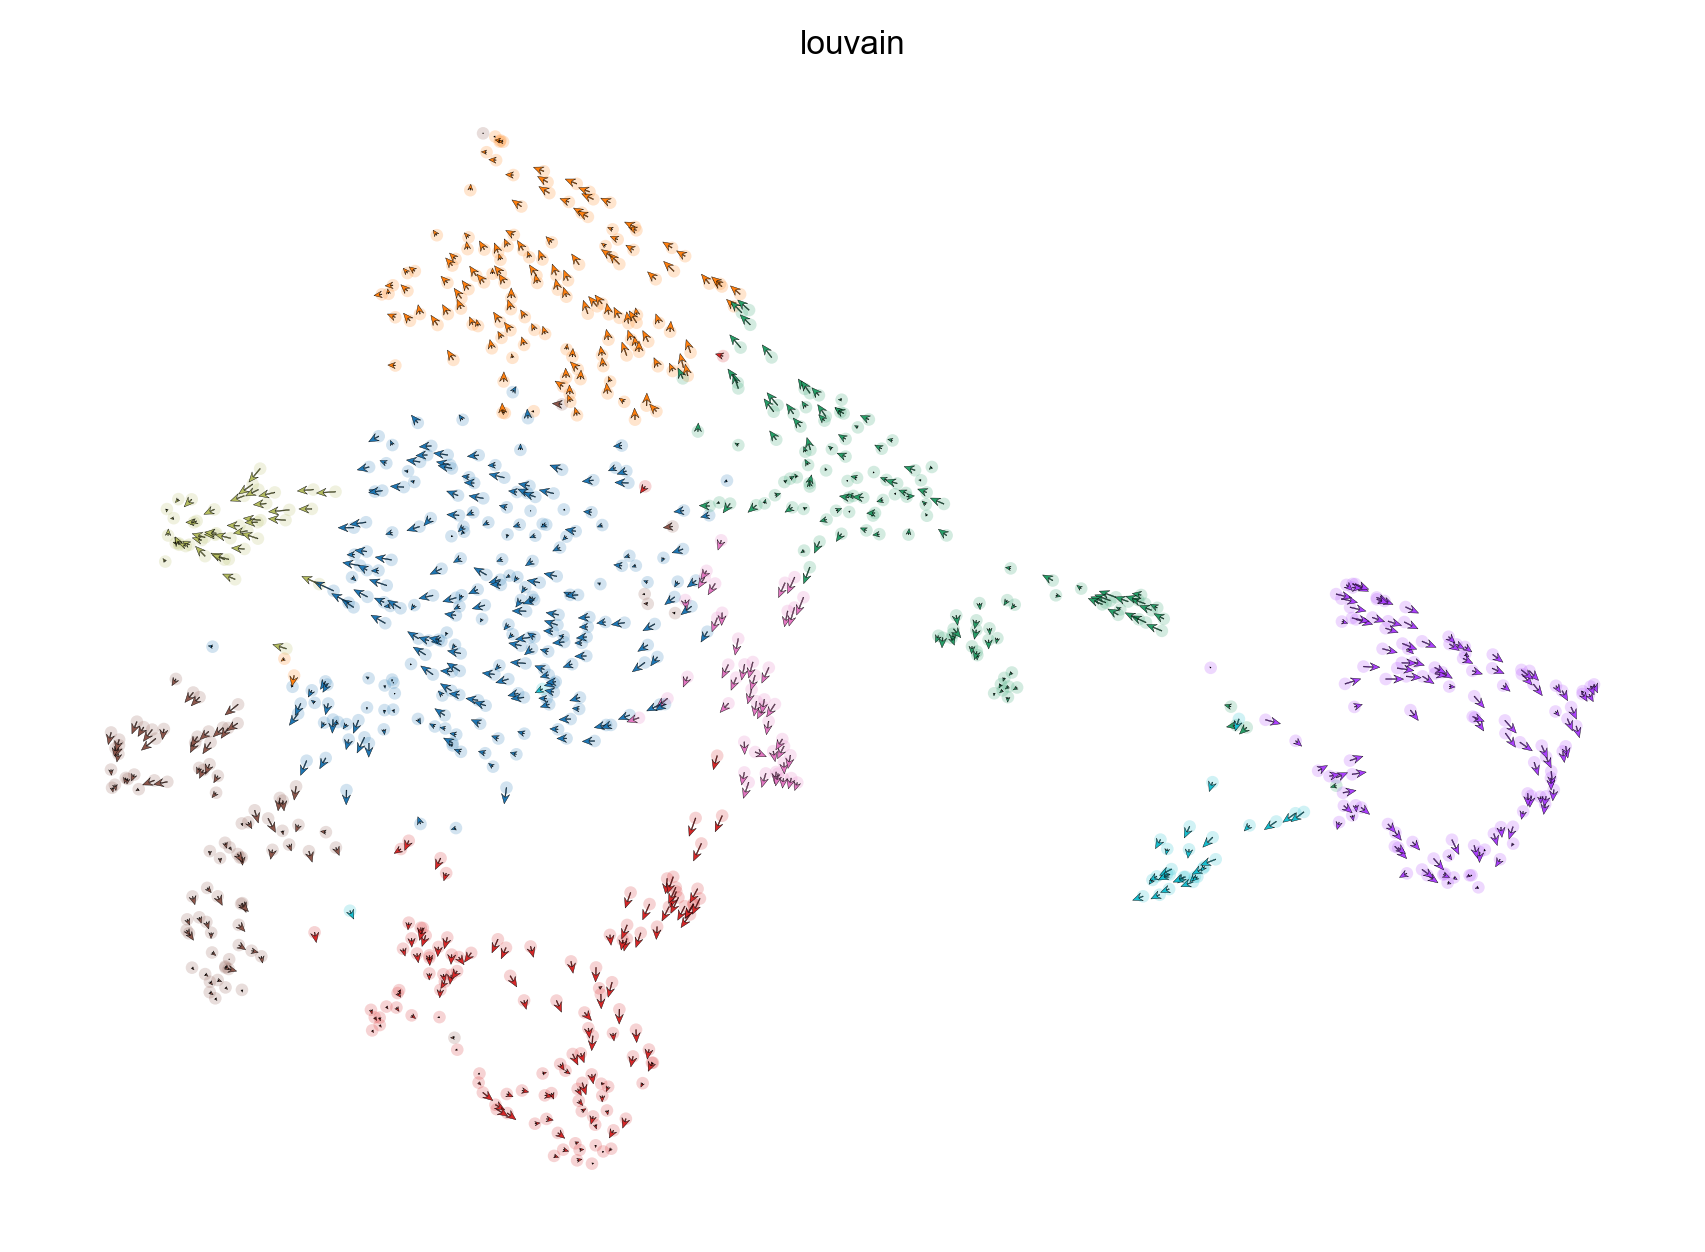

In [12]:
scv.pl.velocity_embedding(adata, basis='umap', dpi=150, save = '_scVELO_umap.pdf')

In [13]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:11:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [14]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:06) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing latent time
    finished (0:00:09) --> added 
    'latent_time', shared time (adata.obs)


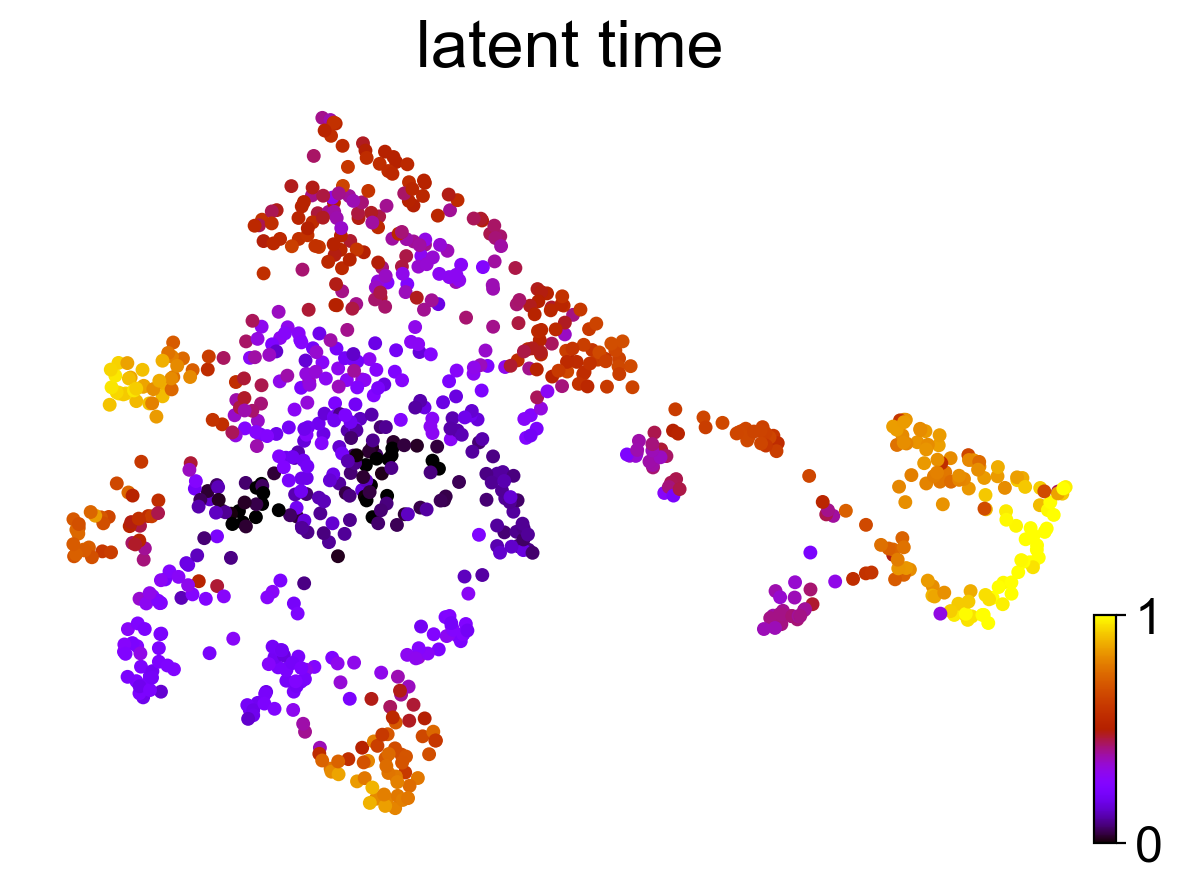

In [15]:
scv.tl.recover_latent_time(adata)

scv.pl.scatter(adata, color='latent_time', fontsize=24, size=100,
               color_map='gnuplot', perc=[2, 98], colorbar=True, rescale_color=[0,1])

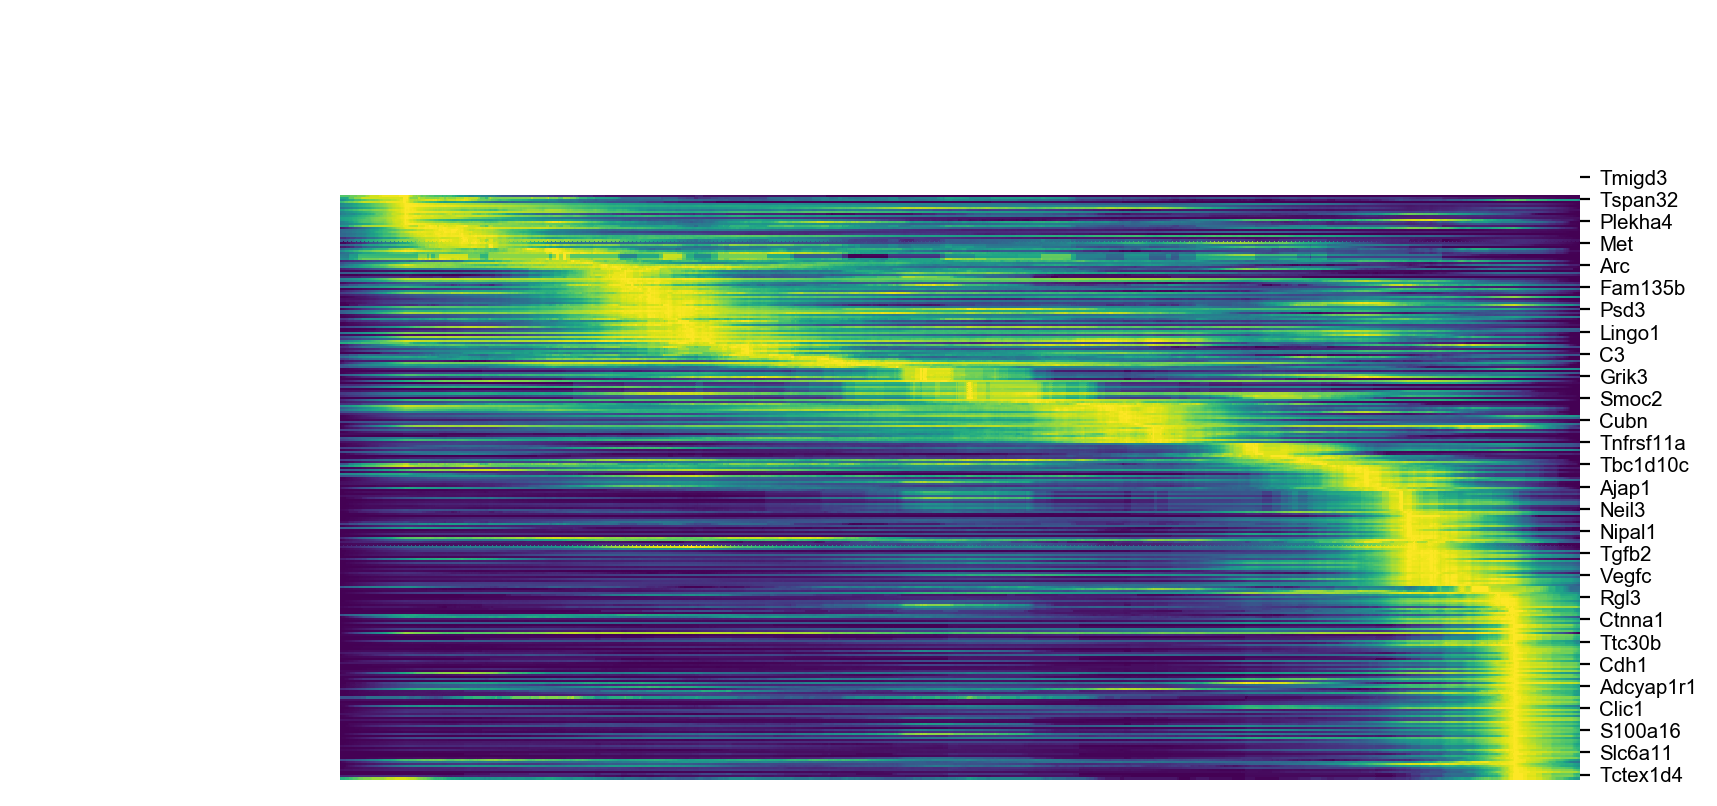

In [21]:
top_genes = adata.var_names[adata.var.fit_likelihood.argsort()[::-1]][:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


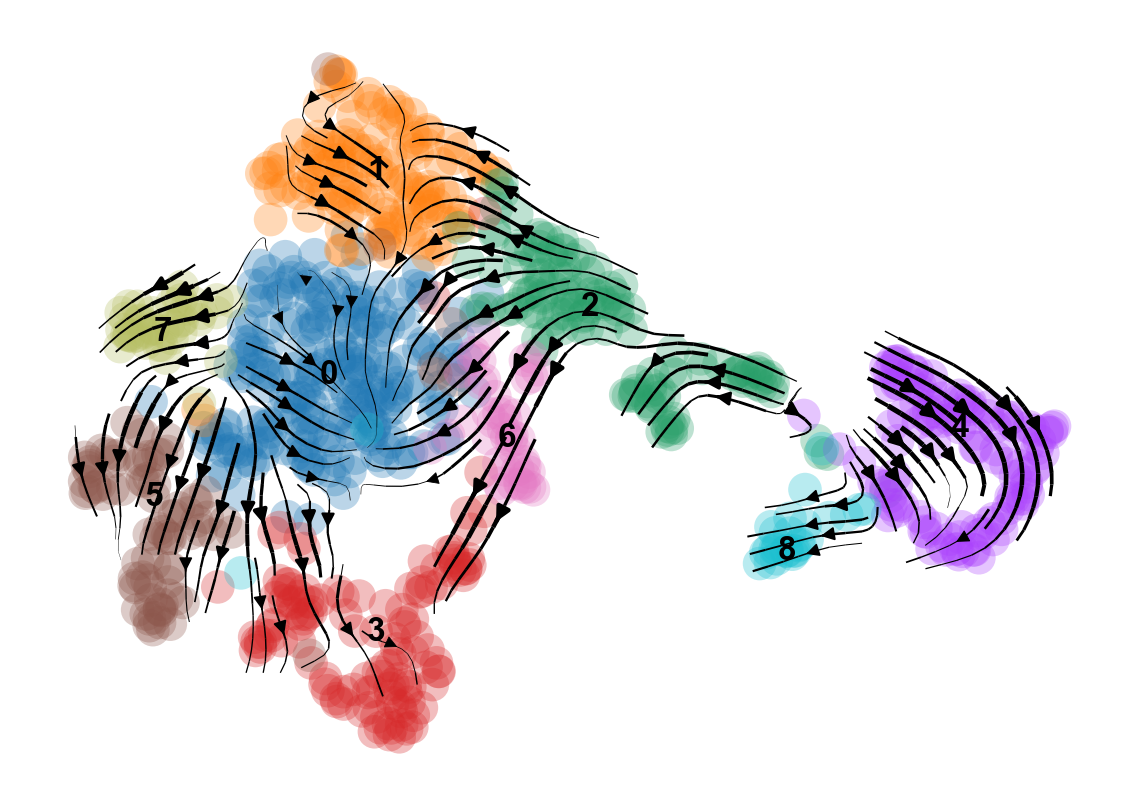

In [18]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)

In [82]:
scv.tl.louvain(adata)
adata

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.35) --> found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


AnnData object with n_obs × n_vars = 948 × 5006 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'plate', 'stage', 'group', 'well_no', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts_norm', 'umap_density_plate', 'louvain'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns:

saving figure to file ./figures/scvelo_Sema3c_velo_umap.pdf


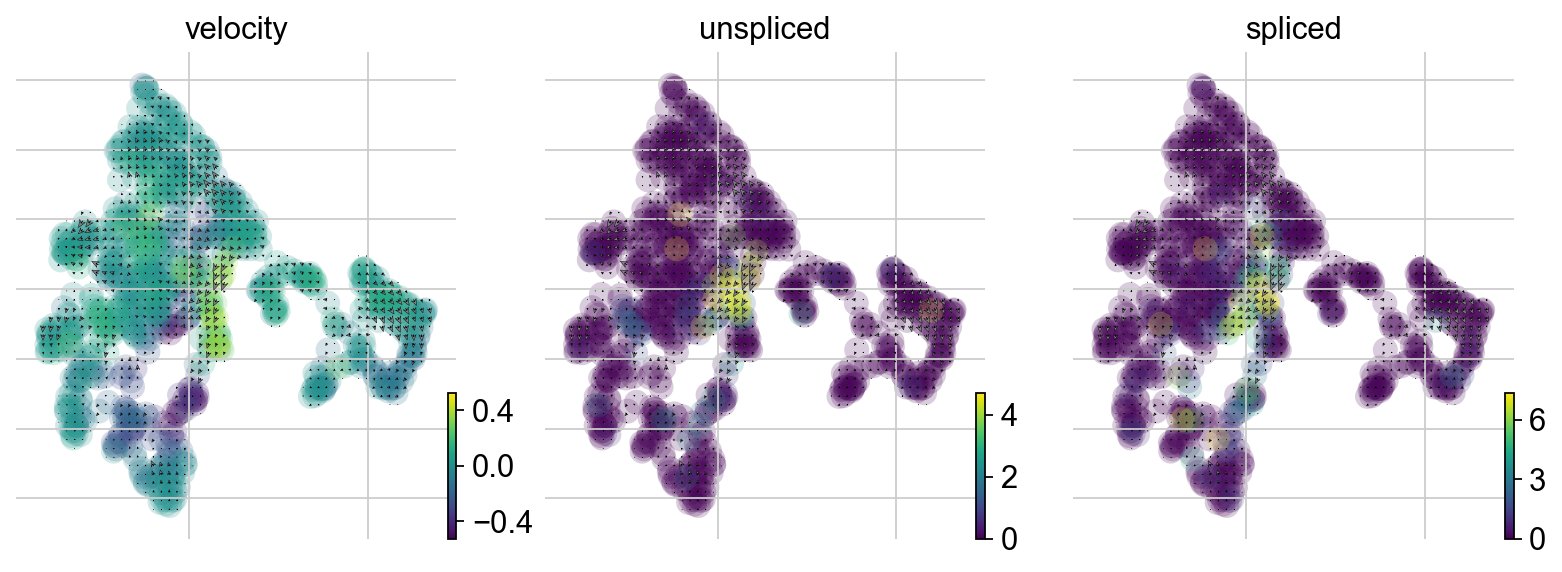

In [33]:
 scv.pl.velocity_embedding_grid(adata, color=['Sema3c'], 
                               layer=['velocity','unspliced','spliced'], arrow_size=3.5, save= 'Sema3c_velo_umap.pdf')

saving figure to file ./figures/scvelo_Runx1t1_velo_umap.pdf


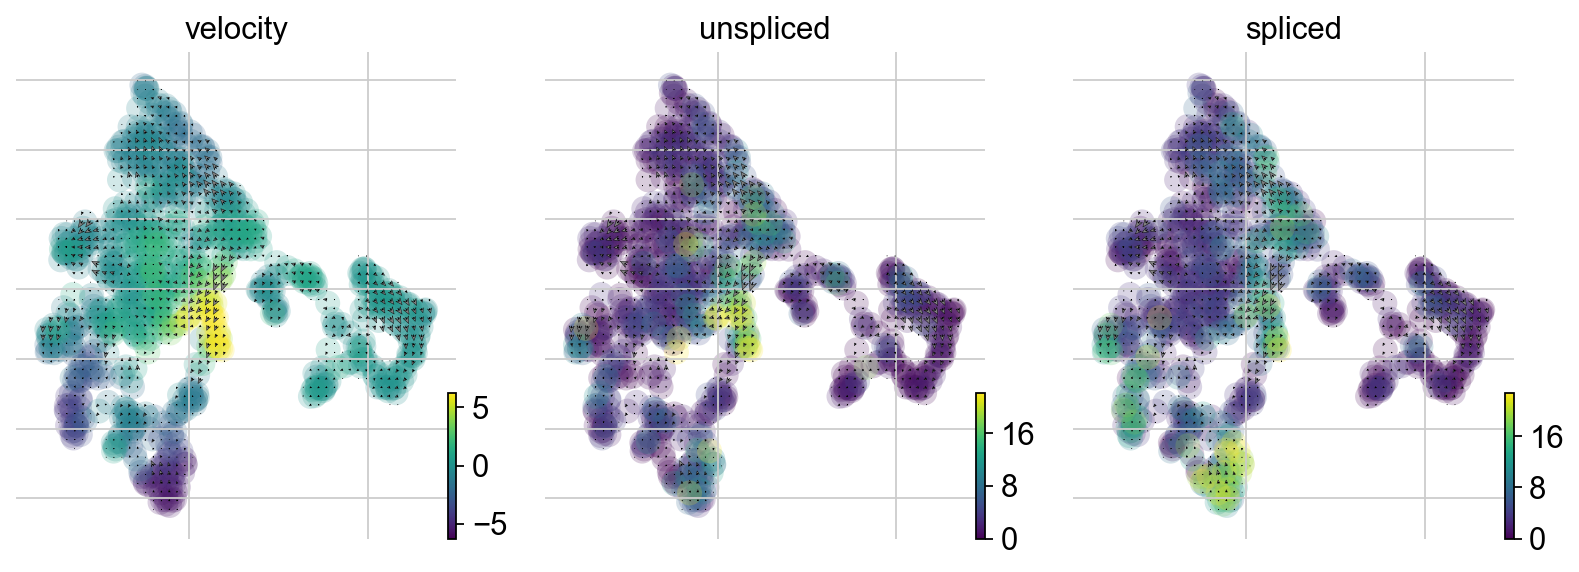

In [39]:
 scv.pl.velocity_embedding_grid(adata, color=['Runx1t1'], 
                               layer=['velocity','unspliced','spliced'], arrow_size=3.5, save= 'Runx1t1_velo_umap.pdf')

In [6]:
scv.tl.rank_velocity_genes(adata, match_with='clusters', resolution=.4)
import pandas as pd
pd.DataFrame(adata.uns['rank_velocity_genes']['names']).head()

computing velocity clusters
    finished (0:00:03) --> added 
    'velocity_clusters', clusters based on modularity on velocity field (adata.obs)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns)


0        1         2       3       4       5        6        7  \
0     Ano1    Tenm3    Pcdh15   Ptprt   Myt1l    Rian    Car10   Anks1b   
1    Aldh2  Fam19a2  Arhgap18    Ldb2  Zfp536   Slit3       Qk  Khdrbs2   
2      Mak  Galnt13     Trpc7    Tpm1  Rbfox1   Unc5d  Runx1t1     Fat3   
3   Hs6st2    Plpp4    Incenp   Pde4b   Abca1  Frmd4a   Col2a1   Gabra2   
4  Gm20125    Fgf12    Lrrtm4  Setbp1   Plpp3   Kcna6    Cbln2    Paqr7   

         8        9  
0    Vat1l    Prkcq  
1   Lypd6b   Lrrc4c  
2    Caln1  Ppp2r2b  
3  Fam212b  Syndig1  
4   Synpo2   Adhfe1

saving figure to file ./figures/scvelo_velo_Sema3c.pdf


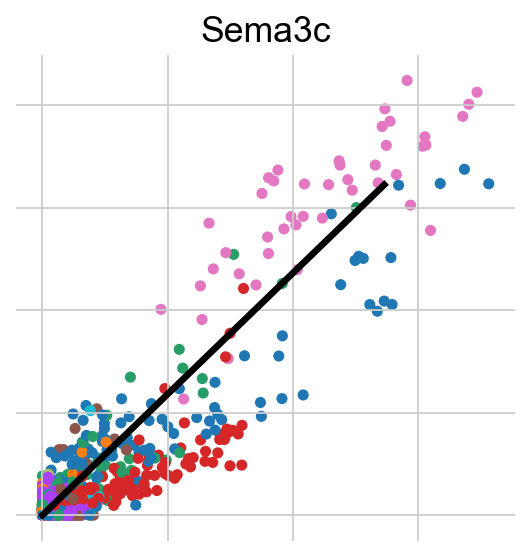

In [32]:
scv.pl.scatter(adata, basis=['Sema3c'], fontsize=16, size=100, linewidth=3,
               frameon=False, legend_loc='none', save="velo_Sema3c.pdf")

saving figure to file ./figures/scvelo_velo_Runx1t1.pdf


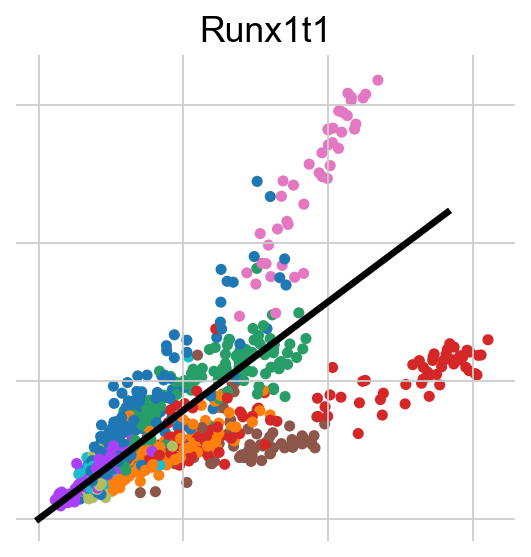

In [34]:
scv.pl.scatter(adata, basis=['Runx1t1'], fontsize=16, size=100, linewidth=3,
               frameon=False, legend_loc='none', save="velo_Runx1t1.pdf")

In [85]:
#something is not right with the last part
#lineage = ['0', '1', '2', '3', '4', '5','6','7','8','9','10','11','12']
adata.obs['lineages'] = [c for c in adata.obs['louvain']] #adata.obs.clusters

In [86]:
#lineage = ['qNSC1', 'aNSCs', 'NB1', 'qNSC2', 'NB2', 'Oligodendrocytes','NB3','qNSC3','neurons','others']
#lineage = ['0', '1', '2', '3', '4', '5','6','7','8','9']
#adata.obs['lineages'] = ['0' if c in lineage else c for c in adata.obs['louvain']] #adata.obs.clusters

scv.tl.terminal_states(adata, groupby='lineages')
scv.tl.velocity_pseudotime(adata, groupby='lineages')

computing terminal states
    identified 0 root cells and 1 end points (0)
    identified 0 root cells and 1 end points (1)
    identified 0 root cells and 1 end points (2)
    identified 0 root cells and 1 end points (3)
    identified 1 root cells and 1 end points (4)
    identified 0 root cells and 1 end points (5)
    identified 1 root cells and 1 end points (6)
    identified 0 root cells and 1 end points (7)
    identified 0 root cells and 0 end points (8)
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


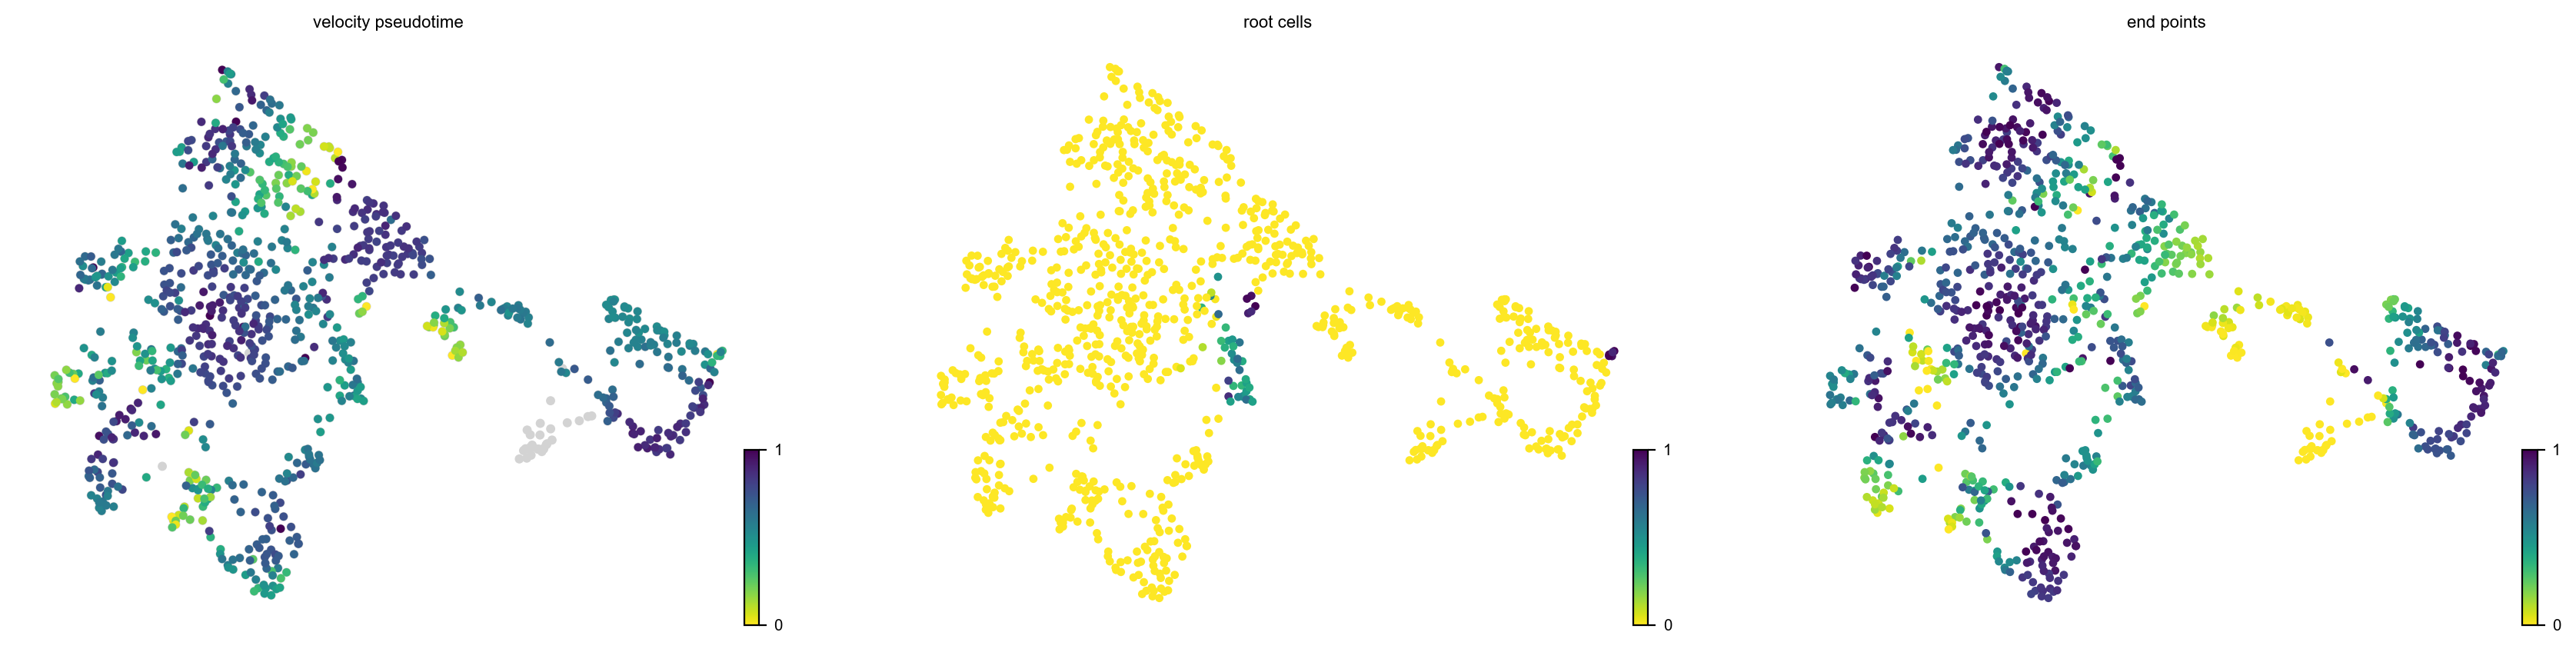

In [87]:
scv.pl.scatter(adata, color=['velocity_pseudotime', 'root_cells', 'end_points'], size=60)


Finally, the velocities are projected onto any embedding specified in `basis` and visualized in one of three available ways: on single cell level, on grid level, or as streamplot as shown here.

In [89]:
#adata.write('./data/output/April2020_E18Hb-WT_quality_filtered_filtered_velo.h5ad')